In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Data description

In [3]:
data = pd.read_csv('../data/cs-training.csv', index_col=0)
medians = data.median()
data = data.fillna(medians)

data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
test_data = pd.read_csv('../data/cs-test.csv', index_col=0)
test_data = test_data.drop("SeriousDlqin2yrs", axis=1)
test_data = test_data.fillna(medians)

test_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101499,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,0.081596,70,0,836.000000,5400.0,3,0,0,0,0.0
101502,0.335457,56,0,3568.000000,5400.0,8,0,2,1,3.0


## Correlation matrix

<Axes: >

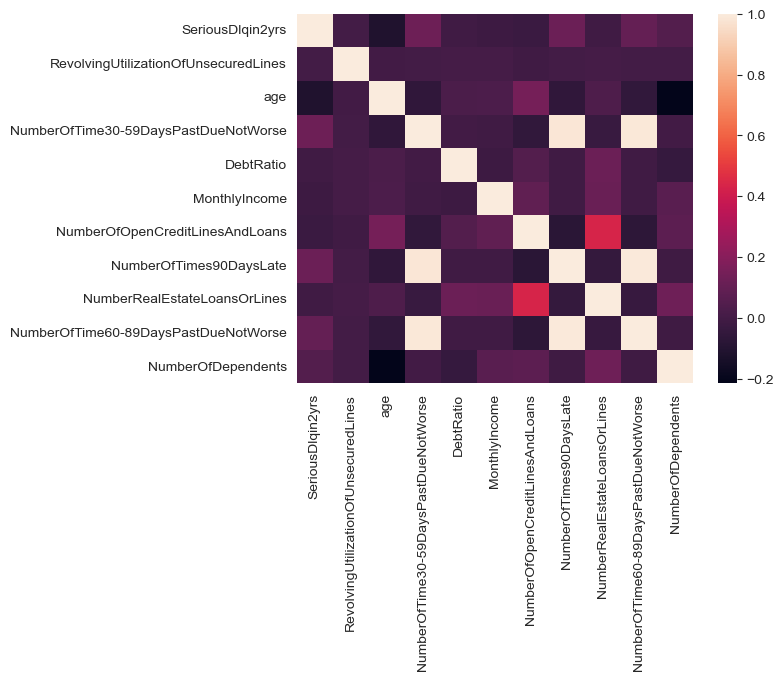

In [5]:
data_corr = data.corr()

sns.heatmap(data_corr)

## Thoughts

The target column depends higher on the age, “NumberOfTime30-59DaysPastDueNotWorse,” “NumberOfTimes90DaysLate” and “NumberOfTime60-89DaysPastDueNotWorse.”

“NumberOfTime30-59DaysPastDueNotWorse,” “NumberOfTimes90DaysLate” and “NumberOfTime60-89DaysPastDueNotWorse” highly correlate with each other.

NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines correlate with each other too.

In [6]:
X_train = data.copy()
X_train = X_train.drop("SeriousDlqin2yrs", axis=1)
Y_train = data["SeriousDlqin2yrs"]

X_test = test_data.copy()

X_train.head()  

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler


def transform_days(temp: pd.DataFrame) -> pd.DataFrame:
    temp["DelayRate"] = temp["NumberOfTime30-59DaysPastDueNotWorse"] + temp["NumberOfTime60-89DaysPastDueNotWorse"] * 2 + temp["NumberOfTimes90DaysLate"] * 3

    temp = temp.drop("NumberOfTime30-59DaysPastDueNotWorse", axis=1)
    temp = temp.drop("NumberOfTime60-89DaysPastDueNotWorse", axis=1)
    temp = temp.drop("NumberOfTimes90DaysLate", axis=1)
    return temp

processed_X_train = transform_days(X_train)
scaler = StandardScaler().fit(processed_X_train)

def normalize(temp: pd.DataFrame) -> pd.DataFrame:
    return scaler.transform(temp)


processed_X_train = normalize(processed_X_train)
processed_X_test = transform_days(test_data)
processed_X_test = normalize(processed_X_test)


processed_X_train

array([[-0.02115001, -0.49385982, -0.17283348, ...,  4.40954554,
         1.14052977,  0.01204543],
       [-0.02038516, -0.83234222, -0.17316771, ..., -0.90128301,
         0.23720186, -0.06818432],
       [-0.02158222, -0.96773518, -0.17318575, ..., -0.90128301,
        -0.66612604,  0.09227518],
       ...,
       [-0.02323239,  0.38619443,  1.72586843, ..., -0.01614492,
        -0.66612604, -0.06818432],
       [-0.02421753, -1.50930703, -0.17322752, ..., -0.90128301,
        -0.66612604, -0.06818432],
       [-0.02081306,  0.79237332, -0.17310489, ...,  0.86899317,
        -0.66612604, -0.06818432]])

In [8]:
from typing import Any

test_index = test_data.index

def save_submission(name: str, estimator: Any, test: np.ndarray):
    y_pred = estimator.predict_proba(test)[:,1]
    pd.Series(y_pred, index=test_index, name="Probability").to_csv("../data/" + name+".csv", index=True, header=True, index_label='Id')


## Naive bayes classifier

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()

np.mean(cross_val_score(nb, processed_X_train, Y_train, cv=5, scoring='roc_auc'))

0.664245534069238

In [27]:
nb.fit(processed_X_train, Y_train)

save_submission("nb", nb, processed_X_test)

0.67 on Kaggle with roc_auc. Bad, but let's do better

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)

np.mean(cross_val_score(knn, X_train, Y_train, cv=5, scoring='roc_auc'))

Let's do a gridsearch for n_neighbors

In [ ]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_neighbors': [1, 5, 10, 15, 20, 50, 100],
}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, params, cv=5, scoring='roc_auc')
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_

In [ ]:
knn = KNeighborsClassifier().set_params(**gs.best_params_) 

np.mean(cross_val_score(knn, X_train, Y_train, cv=5, scoring='roc_auc'))

In [ ]:
knn.fit(X_train, Y_train)

save_submission("knn", knn, test_data)

0.685, better!

Let's try linear classifier

In [ ]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

np.mean(cross_val_score(lr, processed_X_train, Y_train, cv=5, scoring='roc_auc'))

In [ ]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
gs = GridSearchCV(lr, params, cv=5, scoring='roc_auc')
gs.fit(processed_X_train, Y_train)
gs.best_params_

In [ ]:
lr = LogisticRegression().set_params(**gs.best_params_)
lr.fit(processed_X_train, Y_train)

save_submission("lr", lr, processed_X_test)

0.66, it got worse, that was expected

In [ ]:
from sklearn.svm import SVC

#svc = SVC(kernel='poly', degree=3)
#svc.fit(processed_X_train, Y_train)
#save_submission("svc", svc, processed_X_test)

well... neither poly nor rbf kernel took too much time to train

# Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

dtc = DecisionTreeClassifier()

np.mean(cross_val_score(dtc, X_train, Y_train, cv=5, scoring='roc_auc'))

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
}

gs = GridSearchCV(dtc, params, cv=5, scoring='roc_auc')
gs.fit(X_train, Y_train)
gs.best_score_

In [ ]:
dtc = DecisionTreeClassifier().set_params(**gs.best_params_)
dtc.fit(X_train, Y_train)

save_submission("dtc", dtc, X_test)

In [ ]:
test_data

0.846, that's nice! Let's move forward

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=RANDOM_STATE, criterion='entropy')

np.mean(cross_val_score(rfc, X_train, Y_train, cv=5, scoring='roc_auc'))

In [ ]:
params = {
    "n_estimators": [1, 5, 10, 15, 20, 50, 100],
    "max_depth": [5, 10, 20],
}

gs = GridSearchCV(rfc, params, cv=5, scoring='roc_auc')
gs.fit(X_train, Y_train)
gs.best_score_

In [ ]:
rfc.set_params(**gs.best_params_)
rfc.fit(X_train, Y_train)

save_submission("rfc", rfc, test_data)

0.863, better!

# Gradient boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)
gbc.fit(X_train, Y_train)

save_submission("gbc", gbc, test_data)


KeyboardInterrupt



let me try to make my own gradient boosting classifier

In [8]:
%load_ext autoreload
%autoreload 2

In [11]:
from vavgb.model import GradientBoosting


gbc = GradientBoosting(criterion='entropy', n_estimators=100, max_depth=5)
gbc.fit(X_train, Y_train)

save_submission("my_gbc", gbc, test_data)

100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


# 0.863, You gotta be kidding
Let's go and try xgboost

In [13]:
import xgboost as xgb


xgb = xgb.XGBClassifier(n_estimators=100, max_depth=5)
xgb.fit(X_train, Y_train)

save_submission("xgb", xgb, test_data)

0.859, what if i use params from my class?

yeah, it did better

In [14]:
import catboost as cb


cb = cb.CatBoostClassifier()
cb.fit(X_train, Y_train)

save_submission("catboost", cb, test_data)
del cb, xgb

Learning rate set to 0.087524
0:	learn: 0.5663560	total: 197ms	remaining: 3m 16s
1:	learn: 0.4795232	total: 212ms	remaining: 1m 45s
2:	learn: 0.4124481	total: 227ms	remaining: 1m 15s
3:	learn: 0.3666811	total: 240ms	remaining: 59.8s
4:	learn: 0.3268647	total: 256ms	remaining: 50.9s
5:	learn: 0.2934734	total: 271ms	remaining: 44.8s
6:	learn: 0.2687284	total: 285ms	remaining: 40.5s
7:	learn: 0.2535840	total: 301ms	remaining: 37.3s
8:	learn: 0.2391931	total: 317ms	remaining: 34.9s
9:	learn: 0.2293869	total: 331ms	remaining: 32.8s
10:	learn: 0.2201876	total: 347ms	remaining: 31.2s
11:	learn: 0.2118757	total: 364ms	remaining: 29.9s
12:	learn: 0.2062892	total: 382ms	remaining: 29s
13:	learn: 0.2021397	total: 398ms	remaining: 28s
14:	learn: 0.1975883	total: 413ms	remaining: 27.1s
15:	learn: 0.1948528	total: 432ms	remaining: 26.6s
16:	learn: 0.1918745	total: 448ms	remaining: 25.9s
17:	learn: 0.1894676	total: 467ms	remaining: 25.5s
18:	learn: 0.1878602	total: 489ms	remaining: 25.2s
19:	learn: 0

0.864, it's the best score!

In [12]:
#!pip install lightgbm
import lightgbm as lgb


lgb = lgb.LGBMClassifier()
lgb.fit(X_train, Y_train)

save_submission("lgb", lgb, test_data)

[LightGBM] [Info] Number of positive: 10026, number of negative: 139974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066840 -> initscore=-2.636275
[LightGBM] [Info] Start training from score -2.636275


0.864, but private score is better:  0.86078

Let's try the last thing: light auto ML

In [15]:
!pip install lightautoml
from sklearn.metrics import roc_auc_score
from lightautoml.tasks import Task
import pandas as pd

data = pd.read_csv('../data/cs-training.csv', index_col=0)
medians = data.median()
data = data.fillna(medians)

data

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ------------------------------------ --- 8.4/9.1 MB 51.8 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 40.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/791.2 kB ? eta -:--:--
   ---------------------------------------- 791.2/791.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   --------------------- ------------------ 4.2/7.7 MB 19.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.0/7.7 MB 14.8 MB/s eta 0:00:01
   -------------------------------------- - 7.3/7.7 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 11.6 MB/s eta 0:00:00
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=761

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [22]:
test_data = pd.read_csv('../data/cs-test.csv', index_col=0)
test_data.fillna(medians)
task = Task(name='binary', metric=lambda y_true, y_pred: roc_auc_score(y_true, y_pred))
roles = {'target': 'SeriousDlqin2yrs'}

In [25]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML

auto_ml = TabularAutoML(
    task=task,
    timeout=3600,
    cpu_limit=-1,
    memory_limit=-1,
    general_params={'use_algos': [['linear_l2', 'lgb', 'cb']]},
)

auto_ml.fit_predict(train_data=data, roles=roles)
y_pred = auto_ml.predict(test_data).data

In [26]:
ans = y_pred.reshape(-1)
pd.Series(ans, index=test_index, name="Probability").to_csv("../data/lightautoml.csv", index=True, header=True, index_label='Id')


0.862, but it was fun to use automl

Final standings:


![Final standings](../data/img.png)


# 0.86729 Achieved or top 90